<a href="https://colab.research.google.com/github/myGithubAccount26/Biostatistics/blob/master/Biostatistics_Lab_3_Functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<img src = 'https://miro.medium.com/max/2670/1*plcDnA6sjme0RWvxbvaWgg.png'>

<img src='https://user-images.githubusercontent.com/35667308/48126015-2354ab00-e2a6-11e8-9a22-c58ad6ee7733.png'>

In [ ]:
# Get Data file here
# https://drive.google.com/file/d/1Qunag0Gsslz80Jgiyi_tv8d1d8wxRr4l/view?usp=sharing

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-lbj2ff6_
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-lbj2ff6_
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5905 sha256=7e649d8f025b43eeb20d3b28b76d3232b75c32d5ce5e4c0eb554388b8552298c
  Stored in directory: /tmp/pip-ephem-wheel-cache-nb8tuo0f/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
dataset = pd.read_csv('/content/drive/My Drive/Data1/Iris.csv')

FileNotFoundError: ignored

In [ ]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


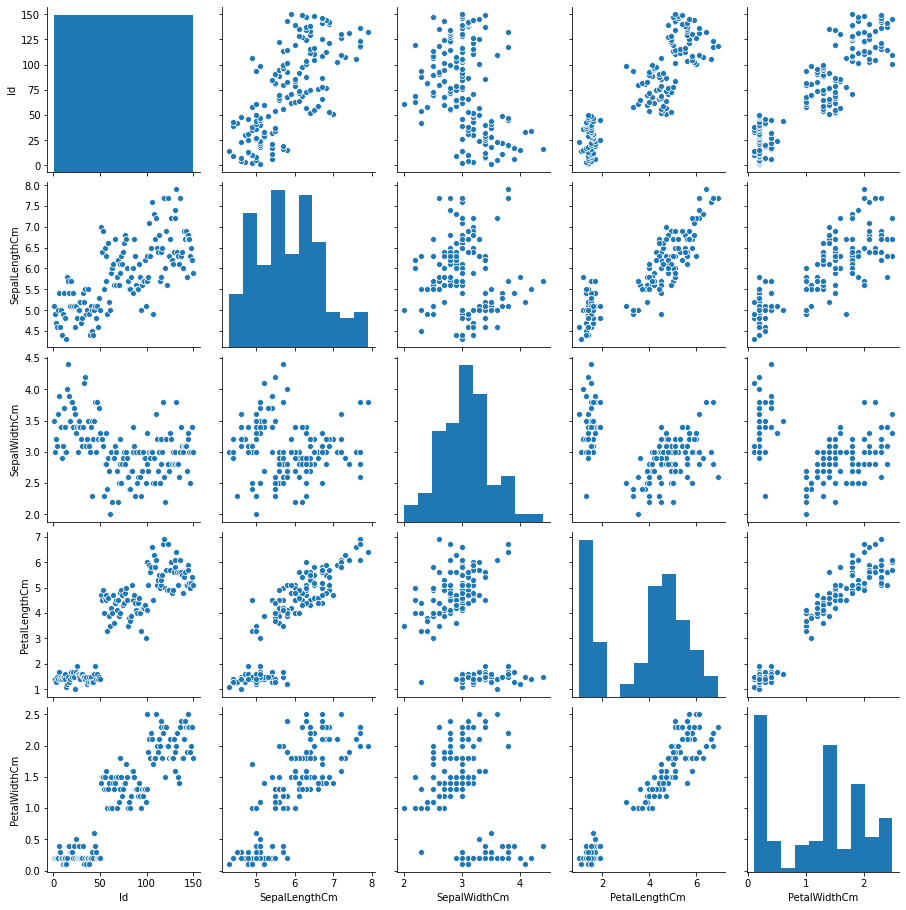

In [ ]:
g = sns.pairplot(dataset)

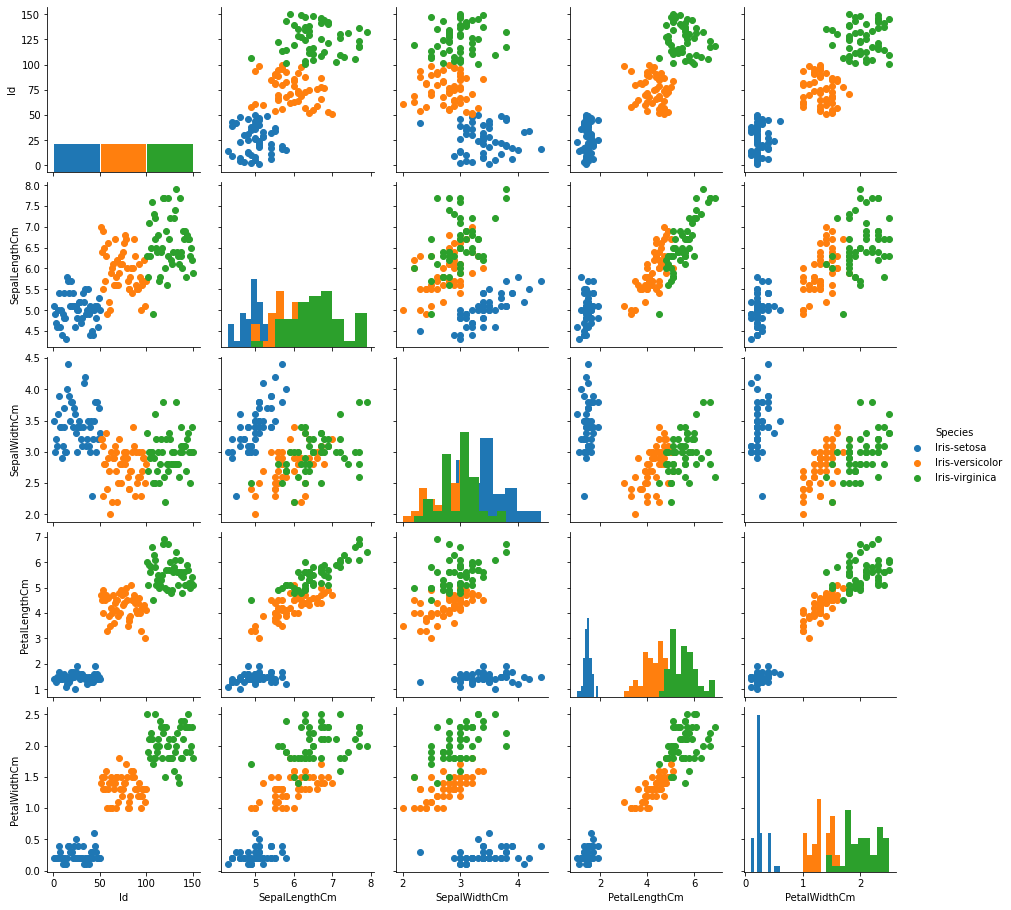

In [ ]:
g = sns.PairGrid(dataset, hue="Species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [ ]:
target_data = dataset[['Species']]
input_data = dataset.drop(['Id','Species'],axis=1)

In [ ]:
input_data = np.array(input_data)

In [ ]:
input_data

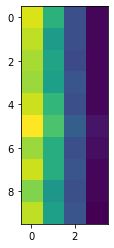

In [ ]:
plt.imshow(input_data[0:10,:])

In [ ]:
target_data = pd.get_dummies(target_data.Species)

In [ ]:
target_data 

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
_, target_data = np.where(target_data==1)

In [ ]:
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
r = np.random.permutation(input_data.shape[0])

In [ ]:
cut = int(0.8*len(r))

In [ ]:
input_data.shape

(150, 4)

In [ ]:
X = input_data[r[:cut],:]
X_test = input_data[r[cut:],:]
Y = target_data[r[:cut]]
Y_test = target_data[r[cut:]]

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def gradient_step(w):

    for j in range(len(w)): 

            w[j].data = w[j].data - c.h*w[j].grad.data
            
            w[j].grad.data.zero_()

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [ ]:
def relu(x):
    return x * (x > 0)

In [ ]:
def model(x,w):

    for j in range(len(w)):

        x = relu(matmul(x,w[j]))

    return x

In [ ]:
wb.init(project="Iris");
c = wb.config

c.h = 0.05
c.b = 20
c.layers = 3 
c.epochs = 2500

c.f_n = [4,16,16,3]

w = [ GPU(randn_trunc((c.f_n[i],c.f_n[i+1]))) for i in range(c.layers) ]

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    loss.backward()

    gradient_step(w)
   
    if (i+1) % 1 == 0:

        make_plots()

In [ ]:
acc(model(X,w),Y)

0.675

In [ ]:
acc(model(X_test,w),Y_test)

0.5666666666666667

In [ ]:
X[0]

tensor([5.6000, 3.0000, 4.1000, 1.3000], device='cuda:0')

In [ ]:
model(X[0],w)

tensor([-0., -0., -0.], device='cuda:0', grad_fn=<MulBackward0>)

In [ ]:
torch.argmax(model(X[0],w))

tensor(1, device='cuda:0')

In [ ]:
Y[0]

tensor(1., device='cuda:0')

In [ ]:
w

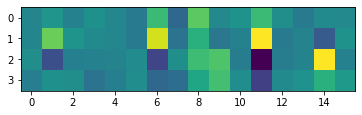

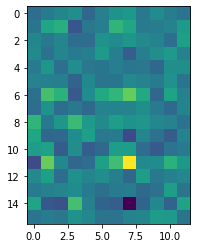

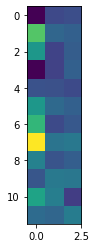

In [ ]:
for i in range(len(w)):

    plt.imshow(w[i].cpu().detach().numpy())
    plt.show()

In [ ]:
def softplus(x):
    return torch.log(1+torch.exp(x))

In [ ]:
def model(x,w):

    for j in range(len(w)):

        x = softplus(matmul(x,w[j]))

    return x